In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

import sklearn.preprocessing as preproc

In [2]:
CFPB=pd.read_csv('shared/complaints_25Nov21.csv')
CFPB

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2016-10-26,Money transfers,International money transfer,Other transaction issues,NaN,"To whom it concerns, I would like to file a fo...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",NaN,NaN,NaN,Consent provided,Web,2016-10-29,Closed with explanation,Yes,No,2180490
1,2015-03-27,Bank account or service,Other bank product/service,"Account opening, closing, or management",NaN,My name is XXXX XXXX XXXX and huband name is X...,Company chooses not to provide a public response,"CITIBANK, N.A.",PA,151XX,Older American,Consent provided,Web,2015-03-27,Closed with explanation,Yes,No,1305453
2,2015-04-20,Bank account or service,Other bank product/service,"Making/receiving payments, sending money",NaN,XXXX 2015 : I called to make a payment on XXXX...,Company chooses not to provide a public response,U.S. BANCORP,PA,152XX,NaN,Consent provided,Web,2015-04-22,Closed with monetary relief,Yes,No,1337613
3,2013-04-29,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",NaN,NaN,NaN,JPMORGAN CHASE & CO.,VA,22406,Servicemember,NaN,Phone,2013-04-30,Closed with explanation,Yes,Yes,393900
4,2013-05-29,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",GA,30044,NaN,NaN,Referral,2013-05-31,Closed with explanation,Yes,No,418647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207255,2015-05-24,Debt collection,Credit card,Taking/threatening an illegal action,Sued w/o proper notification of suit,NaN,NaN,JPMORGAN CHASE & CO.,FL,33133,NaN,Consent not provided,Web,2015-05-24,Closed with explanation,Yes,No,1390395
207256,2012-01-10,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,JPMORGAN CHASE & CO.,NY,10312,NaN,NaN,Referral,2012-01-11,Closed without relief,Yes,Yes,12192
207257,2012-07-17,Student loan,Non-federal student loan,Repaying your loan,NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",NH,032XX,NaN,NaN,Web,2012-07-18,Closed with explanation,Yes,No,118351
207258,2016-09-29,Bank account or service,Checking account,"Account opening, closing, or management",NaN,Near the end of XXXX 2016 I opened a Citigold ...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",CA,900XX,NaN,Consent provided,Web,2016-09-29,Closed with non-monetary relief,Yes,No,2138969


In [3]:
#EDA

In [4]:
CFPB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207260 entries, 0 to 207259
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 207260 non-null  object
 1   Product                       207260 non-null  object
 2   Sub-product                   164245 non-null  object
 3   Issue                         207260 non-null  object
 4   Sub-issue                     10347 non-null   object
 5   Consumer complaint narrative  29391 non-null   object
 6   Company public response       58458 non-null   object
 7   Company                       207260 non-null  object
 8   State                         205066 non-null  object
 9   ZIP code                      197974 non-null  object
 10  Tags                          28265 non-null   object
 11  Consumer consent provided?    51313 non-null   object
 12  Submitted via                 207260 non-null  object
 13 

In [5]:
unique_value=CFPB['Consumer disputed?'].unique()
unique_value

array(['No', 'Yes'], dtype=object)

In [6]:
CFPB_null=CFPB.isnull().sum()
CFPB_null

Date received                        0
Product                              0
Sub-product                      43015
Issue                                0
Sub-issue                       196913
Consumer complaint narrative    177869
Company public response         148802
Company                              0
State                             2194
ZIP code                          9286
Tags                            178995
Consumer consent provided?      155947
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Consumer disputed?                   0
Complaint ID                         0
dtype: int64

In [7]:
number_of_yes = (CFPB['Consumer disputed?'] == 'Yes').sum()
number_of_yes

44903

In [8]:
#X&Y variables

In [9]:
cfpb= CFPB[['Product', 'Sub-product', 'Issue', 'State', 'Tags', 'Submitted via', 'Company response to consumer', 'Timely response?','Consumer disputed?']]
cfpb

,Product,Sub-product,Issue,State,Tags,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
0,Money transfers,International money transfer,Other transaction issues,NaN,NaN,Web,Closed with explanation,Yes,No
1,Bank account or service,Other bank product/service,"Account opening, closing, or management",PA,Older American,Web,Closed with explanation,Yes,No
2,Bank account or service,Other bank product/service,"Making/receiving payments, sending money",PA,NaN,Web,Closed with monetary relief,Yes,No
3,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",VA,Servicemember,Phone,Closed with explanation,Yes,Yes
4,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",GA,NaN,Referral,Closed with explanation,Yes,No
...,...,...,...,...,...,...,...,...,...
207255,Debt collection,Credit card,Taking/threatening an illegal action,FL,NaN,Web,Closed with explanation,Yes,No
207256,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NY,NaN,Referral,Closed without relief,Yes,Yes
207257,Student loan,Non-federal student loan,Repaying your loan,NH,NaN,Web,Closed with explanation,Yes,No
207258,Bank account or service,Checking account,"Account opening, closing, or management",CA,NaN,Web,Closed with non-monetary relief,Yes,No


In [10]:
null_value=cfpb.isnull().sum()
null_value

Product                              0
Sub-product                      43015
Issue                                0
State                             2194
Tags                            178995
Submitted via                        0
Company response to consumer         0
Timely response?                     0
Consumer disputed?                   0
dtype: int64

In [11]:
cfpb.fillna('missing')

,Product,Sub-product,Issue,State,Tags,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
0,Money transfers,International money transfer,Other transaction issues,missing,missing,Web,Closed with explanation,Yes,No
1,Bank account or service,Other bank product/service,"Account opening, closing, or management",PA,Older American,Web,Closed with explanation,Yes,No
2,Bank account or service,Other bank product/service,"Making/receiving payments, sending money",PA,missing,Web,Closed with monetary relief,Yes,No
3,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",VA,Servicemember,Phone,Closed with explanation,Yes,Yes
4,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",GA,missing,Referral,Closed with explanation,Yes,No
...,...,...,...,...,...,...,...,...,...
207255,Debt collection,Credit card,Taking/threatening an illegal action,FL,missing,Web,Closed with explanation,Yes,No
207256,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NY,missing,Referral,Closed without relief,Yes,Yes
207257,Student loan,Non-federal student loan,Repaying your loan,NH,missing,Web,Closed with explanation,Yes,No
207258,Bank account or service,Checking account,"Account opening, closing, or management",CA,missing,Web,Closed with non-monetary relief,Yes,No


In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(cfpb['Consumer disputed?'])# This needs a 1D array
cfpb['encoded_labels'] = y
cfpb

/tmp/ipykernel_2640/3216458495.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cfpb['encoded_labels'] = y


,Product,Sub-product,Issue,State,Tags,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,encoded_labels
0,Money transfers,International money transfer,Other transaction issues,NaN,NaN,Web,Closed with explanation,Yes,No,0
1,Bank account or service,Other bank product/service,"Account opening, closing, or management",PA,Older American,Web,Closed with explanation,Yes,No,0
2,Bank account or service,Other bank product/service,"Making/receiving payments, sending money",PA,NaN,Web,Closed with monetary relief,Yes,No,0
3,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",VA,Servicemember,Phone,Closed with explanation,Yes,Yes,1
4,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",GA,NaN,Referral,Closed with explanation,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...
207255,Debt collection,Credit card,Taking/threatening an illegal action,FL,NaN,Web,Closed with explanation,Yes,No,0
207256,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NY,NaN,Referral,Closed without relief,Yes,Yes,1
207257,Student loan,Non-federal student loan,Repaying your loan,NH,NaN,Web,Closed with explanation,Yes,No,0
207258,Bank account or service,Checking account,"Account opening, closing, or management",CA,NaN,Web,Closed with non-monetary relief,Yes,No,0


In [13]:
#from sklearn.preprocessing import OneHotEncoder
#oh = OneHotEncoder(sparse_output=False)
#myonehot = oh.fit_transform(df.iloc[:, : 7])

In [14]:
X = cfpb.iloc[:,:9]
y = cfpb[['encoded_labels']]

In [15]:
X

,Product,Sub-product,Issue,State,Tags,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
0,Money transfers,International money transfer,Other transaction issues,NaN,NaN,Web,Closed with explanation,Yes,No
1,Bank account or service,Other bank product/service,"Account opening, closing, or management",PA,Older American,Web,Closed with explanation,Yes,No
2,Bank account or service,Other bank product/service,"Making/receiving payments, sending money",PA,NaN,Web,Closed with monetary relief,Yes,No
3,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",VA,Servicemember,Phone,Closed with explanation,Yes,Yes
4,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",GA,NaN,Referral,Closed with explanation,Yes,No
...,...,...,...,...,...,...,...,...,...
207255,Debt collection,Credit card,Taking/threatening an illegal action,FL,NaN,Web,Closed with explanation,Yes,No
207256,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NY,NaN,Referral,Closed without relief,Yes,Yes
207257,Student loan,Non-federal student loan,Repaying your loan,NH,NaN,Web,Closed with explanation,Yes,No
207258,Bank account or service,Checking account,"Account opening, closing, or management",CA,NaN,Web,Closed with non-monetary relief,Yes,No


In [16]:
y

,encoded_labels
0,0
1,0
2,0
3,1
4,0
...,...
207255,0
207256,1
207257,0
207258,0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [18]:
disputed=(X_test['Consumer disputed?'] == 'Yes').sum()
disputed


8948

In [19]:
disputed_no=(X_test['Consumer disputed?'] == 'No').sum()
disputed_no

32504

In [20]:
total_test=disputed+disputed_no
total_test

41452

In [21]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41452 entries, 176548 to 193831
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Product                       41452 non-null  object
 1   Sub-product                   33039 non-null  object
 2   Issue                         41452 non-null  object
 3   State                         41000 non-null  object
 4   Tags                          5723 non-null   object
 5   Submitted via                 41452 non-null  object
 6   Company response to consumer  41452 non-null  object
 7   Timely response?              41452 non-null  object
 8   Consumer disputed?            41452 non-null  object
dtypes: object(9)
memory usage: 3.2+ MB


In [22]:
#q1
rate=disputed/total_test
rate

0.21586413200810575

In [23]:
#q2
from imblearn.under_sampling import RandomUnderSampler

disputed_proportion = np.sum(y_train) / len(y_train)
disputed_proportion_scalar = float(disputed_proportion)
print(f'{disputed_proportion_scalar:.5f}')

undersampler = RandomUnderSampler(random_state=123)
X_train, y_train = undersampler.fit_resample(X_train, y_train)

0.21685


/tmp/ipykernel_2640/2882181586.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  disputed_proportion_scalar = float(disputed_proportion)


In [24]:
df_dropcd=X.drop(['Consumer disputed?'],axis=1)
df_dropcd

,Product,Sub-product,Issue,State,Tags,Submitted via,Company response to consumer,Timely response?
0,Money transfers,International money transfer,Other transaction issues,NaN,NaN,Web,Closed with explanation,Yes
1,Bank account or service,Other bank product/service,"Account opening, closing, or management",PA,Older American,Web,Closed with explanation,Yes
2,Bank account or service,Other bank product/service,"Making/receiving payments, sending money",PA,NaN,Web,Closed with monetary relief,Yes
3,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",VA,Servicemember,Phone,Closed with explanation,Yes
4,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",GA,NaN,Referral,Closed with explanation,Yes
...,...,...,...,...,...,...,...,...
207255,Debt collection,Credit card,Taking/threatening an illegal action,FL,NaN,Web,Closed with explanation,Yes
207256,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NY,NaN,Referral,Closed without relief,Yes
207257,Student loan,Non-federal student loan,Repaying your loan,NH,NaN,Web,Closed with explanation,Yes
207258,Bank account or service,Checking account,"Account opening, closing, or management",CA,NaN,Web,Closed with non-monetary relief,Yes


In [25]:
df=pd.get_dummies(X)
df

,Product_Bank account or service,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,Product_Prepaid card,...,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Company response to consumer_Untimely response,Timely response?_No,Timely response?_Yes,Consumer disputed?_No,Consumer disputed?_Yes
0,False,False,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,True,True,False
1,True,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,True,False
2,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,True,False,True
4,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207255,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,True,True,False
207256,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,True,False,True
207257,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,True,False
207258,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,True,False


In [26]:
X=df.iloc[:,:231]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     32504
           1       0.48      0.00      0.01      8948

    accuracy                           0.78     41452
   macro avg       0.63      0.50      0.44     41452
weighted avg       0.72      0.78      0.69     41452



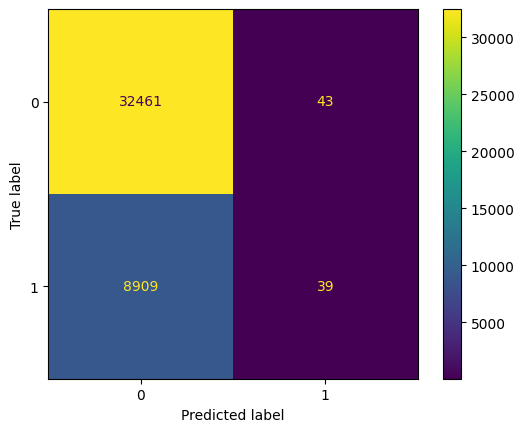

In [27]:
# Fit the model
from xgboost import XGBClassifier

model_xgb = XGBClassifier(random_state=123)

model_xgb.fit(X_train, y_train)

pred = model_xgb.predict(X_test)

print(classification_report(y_true = y_test, y_pred = pred))
ConfusionMatrixDisplay.from_estimator(model_xgb, X_test, y_test);

In [38]:
pred = model_xgb.predict(X_test)[:15]
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [29]:
X_test

,Product_Bank account or service,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,Product_Prepaid card,...,Submitted via_Web,Company response to consumer_Closed,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Company response to consumer_Untimely response,Timely response?_No,Timely response?_Yes
176548,False,False,True,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
48967,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,True
81483,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
8848,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
8282,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9509,False,False,False,False,False,False,True,False,False,False,...,True,False,True,False,False,False,False,False,False,True
70176,False,False,True,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,True
77933,False,False,False,False,False,False,True,False,False,False,...,True,False,True,False,False,False,False,False,False,True
39045,False,False,True,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True


In [30]:
X_train

,Product_Bank account or service,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,Product_Prepaid card,...,Submitted via_Web,Company response to consumer_Closed,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Company response to consumer_Untimely response,Timely response?_No,Timely response?_Yes
1262,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
141457,False,False,True,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
102396,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
70019,False,False,False,False,False,False,True,False,False,False,...,True,False,True,False,False,False,False,False,False,True
113979,False,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119906,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
192476,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
17730,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
28030,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True


In [31]:
y_test

,encoded_labels
176548,0
48967,0
81483,0
8848,0
8282,0
...,...
9509,0
70176,0
77933,0
39045,0


In [32]:
y_train

,encoded_labels
1262,1
141457,1
102396,0
70019,0
113979,0
...,...
119906,0
192476,0
17730,0
28030,0


In [39]:
num_disputed_complaints = (y == 1).sum()
num_disputed_complaints

encoded_labels    44903
dtype: int64

In [40]:
num_nondisputed_complaints = (y == 0).sum()
num_nondisputed_complaints 

encoded_labels    162357
dtype: int64

In [41]:
#no model total cost
cost_disputed = 600
cost_nondisputed = 100
cost_due_diligence = 90

total_cost_disputed = num_disputed_complaints * cost_disputed
total_cost_nondisputed = num_nondisputed_complaints * cost_nondisputed


total_cost = total_cost_disputed + total_cost_nondisputed
total_cost

encoded_labels    43177500
dtype: int64